In [38]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.sparse.linalg import eigsh
from pretrainedModel import pretrainedModel
from tensorflow import keras
from PIL import Image
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
training_features = x_train.reshape(x_train.shape[-0], -1)
test_features = x_test.reshape(x_test.shape[-0], -1)

In [23]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


def extract_features(loader, model):
    features = []
    labels = []
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            output = output.view(data.size(0), -1)  # Flatten the output
            features.append(output)
            labels.append(target)
    return torch.cat(features), torch.cat(labels)

from torchvision import models
model = models.vgg16(pretrained=True) #load vgg16
model.classifier = torch.nn.Identity()

c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [31]:
qwe = CIFAR10(root='./data', train=True, transform=transform, download=True)

Files already downloaded and verified


In [36]:
qwe[0][0].shape

torch.Size([3, 224, 224])

In [26]:
np.random.seed(281)
dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
indices = np.random.permutation(len(dataset)) #with no permutation
graphDB_indices = indices[:500] #500 images as Graph DB
graphDB_subset = Subset(dataset, graphDB_indices)
graphDB_loader = DataLoader(graphDB_subset, batch_size=16, shuffle=True)
query_indices = indices[500:520] #20 images for query
query_subset = Subset(dataset, query_indices)
query_loader = DataLoader(query_subset, batch_size=16, shuffle=True)

graphDB_features, graphDB_labels = extract_features(graphDB_loader, model)
query_features, query_labels = extract_features(query_loader, model)

Files already downloaded and verified


In [30]:
dataset[1]

(tensor([[[ 0.5193,  0.5193,  0.5193,  ..., -0.7650, -0.7650, -0.7650],
          [ 0.5193,  0.5193,  0.5193,  ..., -0.7650, -0.7650, -0.7650],
          [ 0.5193,  0.5193,  0.5193,  ..., -0.7650, -0.7650, -0.7650],
          ...,
          [ 0.6734,  0.6734,  0.6734,  ...,  0.3309,  0.3309,  0.3309],
          [ 0.6734,  0.6734,  0.6734,  ...,  0.3309,  0.3309,  0.3309],
          [ 0.6734,  0.6734,  0.6734,  ...,  0.3309,  0.3309,  0.3309]],
 
         [[ 1.0630,  1.0630,  1.0630,  ..., -0.6176, -0.6176, -0.6176],
          [ 1.0630,  1.0630,  1.0630,  ..., -0.6176, -0.6176, -0.6176],
          [ 1.0630,  1.0630,  1.0630,  ..., -0.6176, -0.6176, -0.6176],
          ...,
          [ 0.5553,  0.5553,  0.5553,  ...,  0.2927,  0.2927,  0.2927],
          [ 0.5553,  0.5553,  0.5553,  ...,  0.2927,  0.2927,  0.2927],
          [ 0.5553,  0.5553,  0.5553,  ...,  0.2927,  0.2927,  0.2927]],
 
         [[ 1.4548,  1.4548,  1.4548,  ..., -0.5844, -0.5844, -0.5844],
          [ 1.4548,  1.4548,

In [20]:
# Instantiate the model
model = pretrainedModel()
print("model loaded")
# Process the images and move the output to the CPU for use in a list
train_images = [Image.fromarray(image).convert('RGB') for image in x_train]
test_images = [Image.fromarray(image).convert('RGB') for image in x_test]
print("images done")
# Ensure the model is in evaluation mode
model.eval()

# Disable gradient calculations for faster inference
with torch.no_grad():
    training_features = np.array([np.array(model(image).cpu()) for image in tqdm(train_images)])

with torch.no_grad():
    test_features = np.array([np.array(model(image).cpu()) for image in tqdm(test_images)])

model loaded
images done


100%|██████████| 10000/10000 [01:17<00:00, 128.87it/s]


In [37]:
from torchvision import models
pretrained_model = models.vgg16(pretrained=True)
pretrained_model.classifier = torch.nn.Identity() # 25088 features output

c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
np.save(r'C:\Users\Test\Desktop\p7\Spectral\features\training_features_cnn.npy', training_features)
np.save(r'C:\Users\Test\Desktop\p7\Spectral\features\test_features_cnn.npy', test_features)

In [4]:

training_features = np.load(r'C:\Users\Test\Desktop\p7\Spectral\features\training_features_cnn.npy')
test_features = np.load(r'C:\Users\Test\Desktop\p7\Spectral\features\test_features_cnn.npy')

In [5]:
scaler = StandardScaler()
training_features = scaler.fit_transform(training_features)  # Standardize the data
test_features = scaler.transform(test_features)

In [6]:
pca = PCA(n_components=1500)  # Set the number of components to keep
training_features = pca.fit_transform(training_features)  # Fit PCA on the standardized data and transform
test_features = pca.transform(test_features)

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06647222, 0.10803638, 0.13405983, ..., 0.96364516, 0.9637422 ,
       0.96383893], dtype=float32)

In [25]:
nbrs = NearestNeighbors(n_neighbors=600).fit(training_features)

# Find the nearest neighbors
distances, indices = nbrs.kneighbors(training_features)

# Create an adjacency matrix
n_samples = training_features.shape[0]
adjacency_matrix = np.zeros((n_samples, n_samples))

# Populate the adjacency matrix
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        adjacency_matrix[i, neighbor] = 1
        adjacency_matrix[neighbor, i] = 1  # Ensure symmetry for an undirected graph

In [26]:
dim=adjacency_matrix.shape[0]
adjacency_matrix = adjacency_matrix - np.identity(dim)
D = np.zeros([dim,dim])
for i in tqdm(range(dim)):
    D[i,i] = adjacency_matrix[i].sum()
L = D- adjacency_matrix

100%|██████████| 60000/60000 [02:12<00:00, 451.90it/s] 


In [27]:
eigenvalues, eigenvectors = eigsh(L, k=32, which="SM") # overvej max_iter, tolerance?
np.save(r'C:\Users\Test\Desktop\p7\Spectral\eigenvectors\eigenvectors_knn.npy', eigenvectors)

In [7]:
eigenvectors = np.load(r'C:\Users\Test\Desktop\p7\Spectral\eigenvectors\eigenvectors_knn.npy')

In [8]:
threshold1 = 0
eigenvectors_bin = np.where(eigenvectors > threshold1, 1, 0)

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(100)).fit(training_features, eigenvectors_bin)
test_hashes = clf.predict(test_features)

c:\Users\Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
def mean_average_precision(test_hashes, training_hashes, test_labels, training_labels, compare_n):
    aps = []
    training_hashes = training_hashes[:compare_n,:]
    training_labels = training_labels[:compare_n]
    for i, test_hash in enumerate(tqdm(test_hashes)):
        label = test_labels[i]
        distances = np.abs(training_hashes - test_hashes[i]).sum(axis=1)
        tp = np.where(training_labels==label, 1, 0)
        hash_df = pd.DataFrame({"distances":distances, "tp":tp}).reset_index()
        hash_df = hash_df.drop(index=i)
        hash_df = hash_df.sort_values(["distances", "index"]).reset_index(drop=True)
        hash_df = hash_df.drop(["index", "distances"], axis=1).reset_index()
        hash_df = hash_df[hash_df["tp"]==1]
        hash_df["tp"] = hash_df["tp"].cumsum()
        hash_df["index"] = hash_df["index"] +1 
        precision = np.array(hash_df["tp"]) / np.array(hash_df["index"])
        ap = precision.mean()
        aps.append(ap)
    
    return np.array(aps).mean()


In [2]:
def p_at_k(test_hashes, training_hashes, test_labels, training_labels, compare_n, k):
    aps = []
    training_hashes = training_hashes[:compare_n,:]
    training_labels = training_labels[:compare_n]
    for i, test_hash in enumerate(tqdm(test_hashes)):
        label = test_labels[i]
        distances = np.abs(training_hashes - test_hashes[i]).sum(axis=1)
        tp = np.where(training_labels==label, 1, 0)
        hash_df = pd.DataFrame({"distances":distances, "tp":tp}).reset_index()
        hash_df = hash_df.drop(index=i)
        hash_df = hash_df.sort_values(["distances", "index"]).reset_index(drop=True)
        hash_df = hash_df[:k]
        patk = hash_df["tp"].sum()/k
        aps.append(patk)
    return np.array(aps).mean()

In [18]:
aps = mean_average_precision(test_hashes, eigenvectors_bin, y_test, y_train, 10000)

100%|██████████| 10000/10000 [00:29<00:00, 343.07it/s]


In [3]:
p_at_k(test_hashes, eigenvectors_bin, y_test, y_train, 10000, 1000)

NameError: name 'test_hashes' is not defined

In [19]:
aps

0.3962587574098195

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Step 1: Perform K-Means Clustering
def kmeans_clustering(hash_codes, n_clusters=10, n_init=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
    clusters = kmeans.fit_predict(hash_codes)
    return clusters

# Step 2: Build the label-cluster matrix
def build_label_cluster_matrix(clusters, true_labels, n_clusters=10):
    # Initialize a matrix to count label-cluster relationships  
    label_cluster_matrix = np.zeros((10, n_clusters), dtype=int)
    
    for label, cluster in zip(true_labels, clusters):
        label_cluster_matrix[label][cluster] += 1
    
    return label_cluster_matrix

# Step 3: Visualize the result as a heatmap
def plot_heatmap(label_cluster_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(label_cluster_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Label Distribution Across Clusters")
    plt.xlabel("Clusters")
    plt.ylabel("True Labels")
    plt.show()


def easyHeatmap(hashCodes, labels):
    raw_clusters = kmeans_clustering(hashCodes, n_clusters=10)

    raw_label_cluster_matrix = build_label_cluster_matrix(raw_clusters, labels)

    plot_heatmap(raw_label_cluster_matrix)

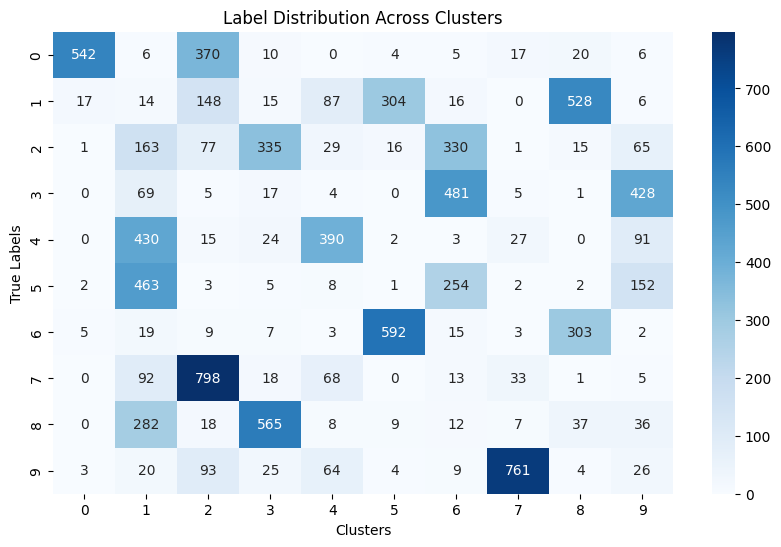

In [20]:
easyHeatmap(test_hashes, y_test)